In [1]:
#data manipulation
import numpy as np
import pandas as pd

#data preprocessing
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,f_regression,chi2
from sklearn.preprocessing import LabelEncoder

#model building
import xgboost as xgt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#model evaulation
from sklearn.metrics import r2_score


In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_int = data.select_dtypes(include=['int64', 'float64'])

In [6]:
#DEALING WITH MISING VALUES
df_int.isna().mean()*100

Id                0.000000
MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
S

<AxesSubplot:>

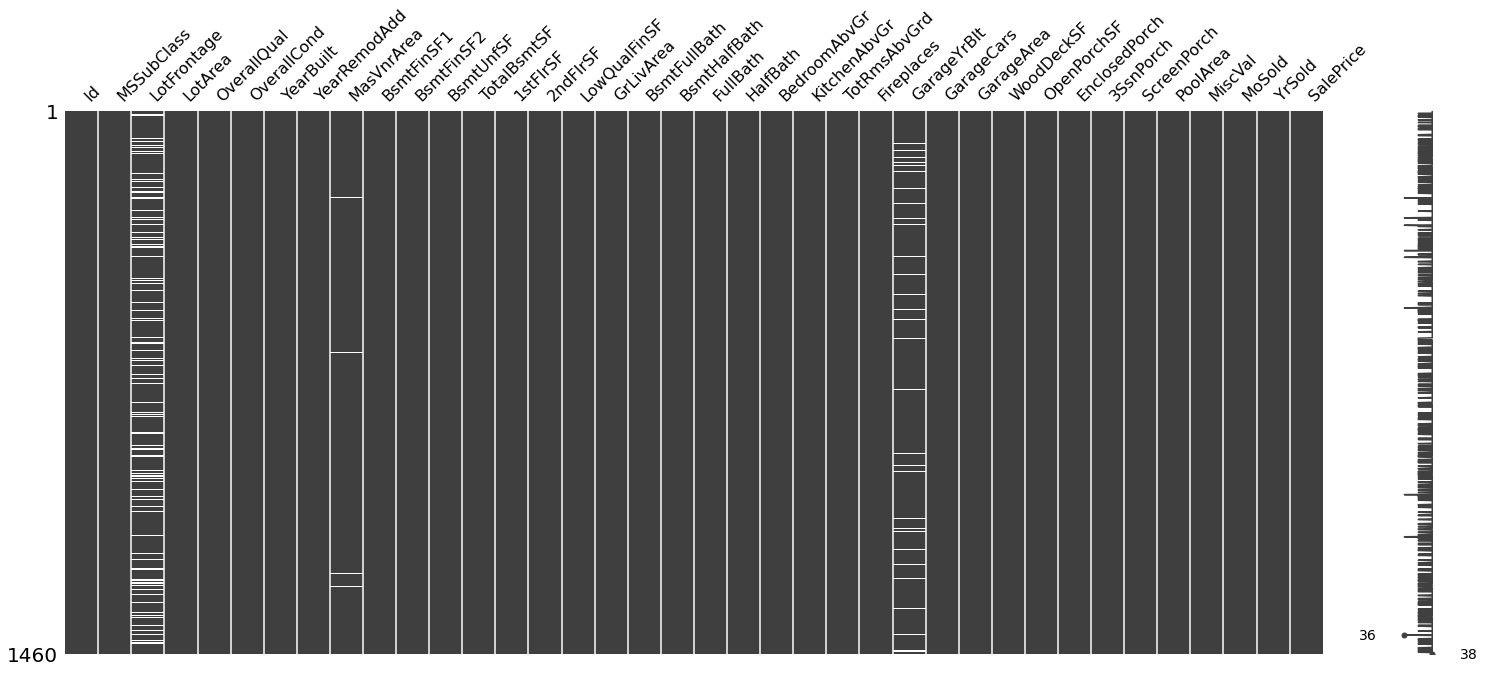

In [7]:
msno.matrix(df_int)

In [15]:
df_int.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [9]:
#using imputation methods to fill in the missing data
imp =SimpleImputer(strategy='mean')
m_imp = df_int.copy()
m_imp.loc[:,:] = imp.fit_transform(m_imp.loc[:,:])

In [10]:
imp_2 = KNNImputer(n_neighbors = 2)
knn_imp = df_int.copy()
knn_imp.loc[:,:]=imp_2.fit_transform(knn_imp.loc[:,:])

In [11]:
imputations = {'mean imputations': m_imp,
             'knn imputations': knn_imp}

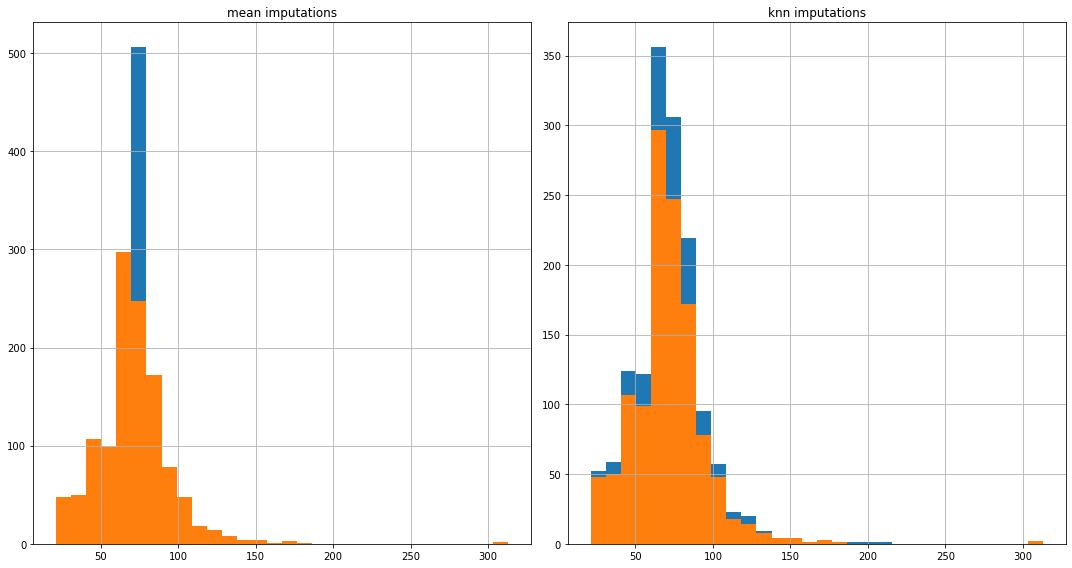

In [12]:
#visualizing how imputed data resembles original data
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8))
for ax, key in zip(ax.flatten(), imputations):
    imputations[key].hist("LotFrontage", bins=30, ax=ax, alpha=1)
    df_int.hist("LotFrontage",bins=30, ax=ax)
    ax.set_title(key)
    plt.tight_layout()

The orange histograms represent the original data while the blue histograms represent the imputed data. From the graphs ot can be noticed that the missing data that was imputd using k-nearest neighbours followed the pattern of the original data unlike that using mean imputations.

In [13]:
df_cat = data.select_dtypes(include='object')

In [14]:
df_cat.isna().mean()*100

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [16]:
df_cat.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

<AxesSubplot:>

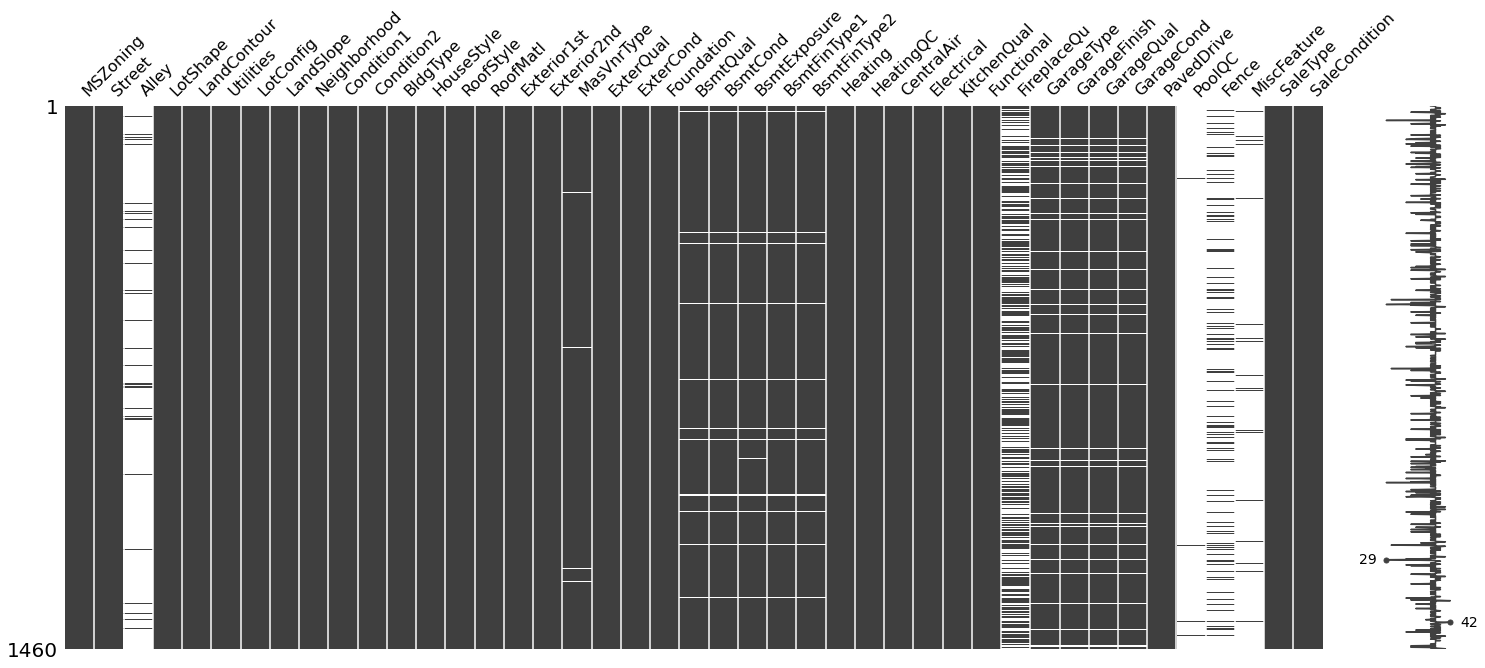

In [17]:
msno.matrix(df_cat)

In [18]:
df_cat.drop(columns=['Alley', 'PoolQC', 'Fence','MiscFeature','FireplaceQu'], inplace=True)

In [19]:
df_cat['Electrical'] = df_cat['Electrical'].fillna(df_cat['Electrical'].mode()[0])

In [20]:
df_cat['MasVnrType'] = df_cat['MasVnrType'].fillna(df_cat['MasVnrType'].mode()[0])

In [21]:
#using a unique value to represent the remaining missing values to maintain the originality of the data
df_cat = df_cat.fillna('Unknown')

In [22]:
#using a labelencoder to transform categorical variables into numerical variables for model
copy = df_cat.copy()
enc = LabelEncoder()
for col in copy.columns:
    copy[col] = enc.fit_transform(copy[col])

# MODEL BUILDING WITHOUT FEATURE SELECTION

In [23]:
X,y = knn_imp.loc[:,df_int.columns!='SalePrice'],knn_imp.loc[:,'SalePrice']

In [24]:
new_d = pd.concat([X, copy], axis=1)

In [25]:
#splitting the data into training and validation for model building and evaluation  
X_train, X_test, y_train, y_test = train_test_split(new_d, y, test_size=0.3, random_state=42)

In [26]:
model = xgt.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [27]:
 m = model.predict(X_test)

In [28]:
r2_score(y_test,m)

0.8940924685771732

In [29]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
n = model2.predict(X_test)

In [31]:
r2_score(y_test, n)

0.8941985945564279

# MODEL BUILDING WITH FEATURE SELECTION

selecting features for numerical variables

In [32]:
selector =  SelectKBest(f_regression,k='all')
X_int =selector.fit_transform(X,y)

In [33]:
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

       Feat_names     F_Scores
4     OverallQual  2436.770591
16      GrLivArea  1470.585010
26     GarageCars  1013.705666
27     GarageArea   926.951287
12    TotalBsmtSF   880.341282
13       1stFlrSF   845.524488
19       FullBath   668.430296
23   TotRmsAbvGrd   580.762801
6       YearBuilt   548.665821
25    GarageYrBlt   508.280075
7    YearRemodAdd   504.714855
8      MasVnrArea   436.672173
24     Fireplaces   406.503866
9      BsmtFinSF1   255.923517
2     LotFrontage   196.862615
28     WoodDeckSF   171.494673
14       2ndFlrSF   165.561151
29    OpenPorchSF   161.577391
20       HalfBath   128.018964
3         LotArea   109.090355
17   BsmtFullBath    79.300912
11      BsmtUnfSF    70.303948
21   BedroomAbvGr    42.456412
22   KitchenAbvGr    27.437234
30  EnclosedPorch    24.509275
32    ScreenPorch    18.336600
33       PoolArea    12.556221
1      MSSubClass    10.431466
5     OverallCond     8.891623
35         MoSold     3.150172
31      3SsnPorch     2.903843
36      

In [34]:
#removing nunmerical variables for model buidling with F_score<10
selector3 = SelectKBest(f_regression, k=20)
X2 = selector3.fit_transform(X,y)
names3 = X.columns.values[selector3.get_support()]
fea_int = X.loc[:,names3]
fea_int.shape

(1460, 20)

FEATURE SELECTION FOR CATEGORICAL VARIABLES

In [35]:
selector2 =  SelectKBest(chi2,k='all')
X_cat =selector2.fit_transform(copy,y)

In [36]:
names2 = copy.columns.values[selector2.get_support()]
scores2 = selector2.scores_[selector2.get_support()]
names_scores2 = list(zip(names2, scores2))
ns_df2 = pd.DataFrame(data = names_scores2, columns=['Feat_names', 'F_Scores'])
ns_df_sorted2 = ns_df2.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted2)

       Feat_names     F_Scores
7    Neighborhood  2194.267106
10       BldgType  1951.478245
26      HeatingQC  1483.144925
31     GarageType  1264.929866
6       LandSlope   889.793781
23   BsmtFinType1   836.377738
11     HouseStyle   812.887720
15    Exterior2nd   808.619925
2        LotShape   802.972897
14    Exterior1st   696.025906
32   GarageFinish   600.010191
5       LotConfig   564.633630
22   BsmtExposure   466.596456
20       BsmtQual   367.698026
12      RoofStyle   356.053615
29    KitchenQual   303.823780
19     Foundation   302.333392
4       Utilities   242.333333
13       RoofMatl   229.029740
28     Electrical   213.371047
8      Condition1   212.616289
37  SaleCondition   212.586578
17      ExterQual   209.777237
36       SaleType   187.470404
16     MasVnrType   161.240019
3     LandContour   124.357379
24   BsmtFinType2   118.159077
0        MSZoning   113.803139
21       BsmtCond   108.800850
30     Functional    97.519754
35     PavedDrive    93.289255
18      

In [37]:
#removing variables with F-score <10
selector4 =  SelectKBest(chi2,k=37)
X_cat =selector4.fit_transform(copy,y)
names4 = copy.columns.values[selector4.get_support()]
fea_cat = copy.loc[:,names4]
fea_cat.shape

(1460, 37)

In [39]:
m_data = pd.concat([fea_int, fea_cat], axis=1)

In [40]:
 X_train1, X_test1, y_train1, y_test1 = train_test_split(m_data, y, test_size=0.3, random_state=42)

In [41]:
model3 = xgt.XGBRegressor(objective='reg:linear', random_state=42)
model3.fit(X_train1, y_train1)

[16:35:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [42]:
pred3 = model3.predict(X_test1)

In [43]:
r2_score(y_test1,pred3)

0.8873711035226804

In [44]:
model4 = RandomForestRegressor()
model4.fit(X_train1, y_train1)

RandomForestRegressor()

In [45]:
pred4 = model4.predict(X_test1)

In [46]:
r2_score(y_test1, pred4)

0.8996103244906528

random forest regressor with selected features produced best outcome as such we would use it for prediction

# PREDICTIONS

In [47]:
test = pd.read_csv('test.csv')

In [48]:
test.dtypes.value_counts()

object     43
int64      26
float64    11
dtype: int64

In [49]:
test_int = test.select_dtypes(include=['int64', 'float64'])

In [50]:
test_cat = test.select_dtypes(include='object')

In [70]:
test_int.isnull().sum()

LotFrontage     0
LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

In [52]:
test_int['BsmtFinSF1'] = test_int['BsmtFinSF1'].fillna(test_int['BsmtFinSF1'].mode()[0])
test_int['BsmtFinSF2'] = test_int['BsmtFinSF2'].fillna(test_int['BsmtFinSF2'].mode()[0])
test_int['BsmtUnfSF'] = test_int['BsmtUnfSF'].fillna(test_int['BsmtUnfSF'].mode()[0])
test_int['TotalBsmtSF'] = test_int['TotalBsmtSF'].fillna(test_int['TotalBsmtSF'].mode()[0])
test_int['BsmtHalfBath'] = test_int['BsmtHalfBath'].fillna(test_int['BsmtHalfBath'].mode()[0])
test_int['BsmtFullBath'] = test_int['BsmtFullBath'].fillna(test_int['BsmtFullBath'].mode()[0])
test_int['GarageCars'] = test_int['GarageCars'].fillna(test_int['GarageCars'].mode()[0])
test_int['GarageArea'] = test_int['GarageArea'].fillna(test_int['GarageArea'].mode()[0])

In [53]:
test_int.loc[:,:] = imp_2.fit_transform(test_int.loc[:,:])

In [54]:
test_int.drop(columns=['Id', 'MSSubClass','OverallCond','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtFullBath', 'BsmtHalfBath','BedroomAbvGr', 'KitchenAbvGr','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold'],inplace=True)

In [69]:
test_cat.isnull().sum()

MSZoning         0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [56]:
test_cat.drop(columns=['Alley', 'PoolQC', 'Fence','MiscFeature','FireplaceQu'], inplace=True)

In [57]:
test_cat['MSZoning'] = test_cat['MSZoning'].fillna(test_cat['MSZoning'].mode()[0])
test_cat['Utilities'] = test_cat['Utilities'].fillna(test_cat['Utilities'].mode()[0])
test_cat['Exterior1st'] = test_cat['Exterior1st'].fillna(test_cat['Exterior1st'].mode()[0])
test_cat['Exterior2nd'] = test_cat['Exterior2nd'].fillna(test_cat['Exterior2nd'].mode()[0])
test_cat['KitchenQual'] = test_cat['KitchenQual'].fillna(test_cat['KitchenQual'].mode()[0])
test_cat['Functional'] = test_cat['Functional'].fillna(test_cat['Functional'].mode()[0])
test_cat['SaleType'] = test_cat['SaleType'].fillna(test_cat['SaleType'].mode()[0])

In [58]:
test_cat = test_cat.fillna('Unknown')

In [59]:
for col in test_cat.columns:
    test_cat[col] = enc.fit_transform(test_cat[col])

In [60]:
test_cat.drop(columns='Street', inplace=True)

In [61]:
test_data = pd.concat([test_int,test_cat], axis = 1)

In [62]:
test_data.shape

(1459, 57)

In [63]:
predicted = model4.predict(test_data)

In [64]:
predicted = pd.DataFrame(predicted)

In [65]:
predicted = predicted.rename({0:'SalePrice'},axis=1)


In [66]:
predicted['Id'] = test['Id']

In [67]:
predicted = predicted[['Id','SalePrice']]

In [71]:
predicted

,Id,SalePrice
0,1461,123987.00
1,1462,156805.82
2,1463,190145.65
3,1464,185214.50
4,1465,208433.66
...,...,...
1454,2915,89056.00
1455,2916,90574.50
1456,2917,147673.50
1457,2918,121376.87
